# Kahoot Data analysis Case

### Objective of the Analysis

In this interview challenge, I've chosen to focus on a particular scope within the broader context of the "World University Rankings" datasets. **My primary objective is to identify where Kahoot! should concentrate its marketing and sales endeavors to maximize its reach and impact.** I have chosen this angle to make use of both sides of my background; Using data to make the basis for a business strategy.

### Datasets at Our Disposal

The datasets available for this analysis provide comprehensive insights into university rankings from multiple perspectives:

1. CWUR Data: Rankings courtesy of the Center for World University Rankings.
2. Shanghai Data: Insights derived from the Academic Ranking of World Universities, popularly known as the "Shanghai Rankings."
3. Times Data: Rankings sourced from The Times Higher Education World University Ranking.
4. Educational Attainment Data: Supplementary data that sheds light on the average years of schooling across nations.
5. Education Expenditure Data: A dataset detailing the direct expenditure on education for various countries.
6. School_and_country_table: A dataset that provides information about country for each university.

By analyzing information from these datasets, I aim to craft recommendations for Kahoot!'s marketing and sales strategy.


### How will I approach this analysis?
1. Dataset Selection: I'll review the datasets and pick one based on quality and relevance to our goal.
2. Criteria Identification: I'll set clear criteria to target universities that match Kahoot!'s goals.
3. Filtering: Using the criteria, I'll narrow down the list of universities to those most aligned with our objectives.
4. Recommendations & Discussion: I'll analyze the filtered list, provide recommendations and discuss the key takeaways.

# Data loading and exploration

## Imports      

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Data

In [6]:
cwur_data_orig = pd.read_csv('data/cwurData.csv')
shanghai_data_orig = pd.read_csv('data/shanghaiData.csv')
times_data_orig = pd.read_csv('data/timesData.csv')


In [7]:
#Copy the dataframes to avoid having to reload the data
cwur_data = cwur_data_orig.copy()
shanghai_data = shanghai_data_orig.copy()
times_data = times_data_orig.copy()

## Preliminary data exploration

### TLDR:

* Shanghai Data: No country column present; needs a workaround for country-based comparisons.
* Data Types & Missing Values:
    * CWUR Data: All good, no missing values.
    * Shanghai Data: Missing values in total_score; world_rank and national_rank need datatype conversion.
    * Times Data: Missing values present; several columns need datatype conversion.
* Coverage:
    * CWUR: 2012-2015 with a high number of unique universities. Minimum 100 entries per year.
    * Shanghai: 2005-2015 with a moderate number of unique universities. Minimum 100 entries per year.
    * Times: 2011-2016 with a moderate number of unique universities. Minimum 200 entries per year, or minimum 400 entries if we cut of 2011.
* Duplicates: No duplicates in any dataset.
* Top Countries by University Count: The USA consistently tops in all three rankings, followed by countries like China, UK, Japan, and Germany.

### Quick view

In [8]:
print("CWUR Data:")
display(cwur_data.head())
print("\nShanghai Data:")
display(shanghai_data.head())
print("\nTimes Data:")
display(times_data.head())

CWUR Data:


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012



Shanghai Data:


,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005



Times Data:


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


* Shanghai does not have a column for university country. We have to work around this in some way if we want to compare the countries.

### Dataset Dimensions

Check the number of rows and columns in each dataset.

In [9]:
print("CWUR Data Dimensions:", cwur_data.shape)
print("Shanghai Data Dimensions:", shanghai_data.shape)
print("Times Data Dimensions:", times_data.shape)

CWUR Data Dimensions: (2200, 14)
Shanghai Data Dimensions: (4897, 11)
Times Data Dimensions: (2603, 14)


### Data Types and Missing Values

Examine the data types of each column and look for missing values. This step will help in identifying if any columns need type conversion or if any missing values need to be addressed.

In [10]:
print("CWUR Data Info:")
print(cwur_data.info())

CWUR Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+

* Column datatypes seem fine and no missing values

In [11]:
print("\nShanghai Data Info:")
print(shanghai_data.info())


Shanghai Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4897 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   total_score      1101 non-null   float64
 4   alumni           4896 non-null   float64
 5   award            4895 non-null   float64
 6   hici             4895 non-null   float64
 7   ns               4875 non-null   float64
 8   pub              4895 non-null   float64
 9   pcp              4895 non-null   float64
 10  year             4897 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 421.0+ KB
None


* Some missing values, especially for column total_score.
 * World_rank and national_rank should be numeric datatypes, not objects. This has to be changed.

In [12]:
print("\nTimes Data Info:")
print(times_data.info())


Times Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1

* Some missing values. 
* Datatypes for world_rank, income, total_score, international_students and female_male_ratio should be made into numeric datatypes

### Basic Descriptive Statistics

Get a summary of central tendencies, dispersion, and shape of the dataset's distribution.

In [13]:
print("CWUR Data Description:")
display(cwur_data.describe())
print("\nShanghai Data Description:")
display(shanghai_data.describe())
print("\nTimes Data Description:")
display(times_data.describe())


CWUR Data Description:


,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000



Shanghai Data Description:


,total_score,alumni,award,hici,ns,pub,pcp,year
count,1101.000000,4896.000000,4895.00000,4895.000000,4875.000000,4895.000000,4895.000000,4897.000000
mean,36.383470,9.161724,7.69191,16.221491,16.078503,38.254648,21.242329,2009.658566
std,13.557186,14.140636,15.49411,14.382710,12.511529,13.050809,9.254351,3.197576
min,23.500000,0.000000,0.00000,0.000000,0.000000,7.300000,8.300000,2005.000000
25%,27.400000,0.000000,0.00000,7.300000,8.000000,28.900000,15.600000,2007.000000
50%,31.300000,0.000000,0.00000,12.600000,12.800000,36.000000,19.000000,2009.000000
75%,41.800000,15.600000,13.40000,21.700000,19.800000,45.300000,24.500000,2012.000000
max,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,2015.000000



Times Data Description:


,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


* Years: CWUR has data from 2014 to 2015, Shanghai has from 2009 to 2015 and Times has from 2014 to 2016.
* Datatypes: Numerical columns wrongly set as datatype object prevents it from calculating descriptive data. This has to be fixed if we want to use these columns for analysis.

### Unique Entries

For categorical variables or columns like university names or countries, it's helpful to check the number of unique entries. This can give insights into the diversity of the data.

In [14]:
print("Unique universities in CWUR data:", cwur_data['institution'].nunique())
print("Unique universities in Shanghai data:", shanghai_data['university_name'].nunique())
print("Unique universities in Times data:", times_data['university_name'].nunique())

Unique universities in CWUR data: 1024
Unique universities in Shanghai data: 658
Unique universities in Times data: 818


This could mean that there is more variety in the universities included in the CWUR data, but this has to be compared against how many are ranked per year before we can say anything.

### Check for Duplicates

Ensure that there are no duplicate entries in the datasets.

In [15]:
print("Duplicate entries in CWUR data:", cwur_data.duplicated().sum())
print("Duplicate entries in Shanghai data:", shanghai_data.duplicated().sum())
print("Duplicate entries in Times data:", times_data.duplicated().sum())

Duplicate entries in CWUR data: 0
Duplicate entries in Shanghai data: 0
Duplicate entries in Times data: 0


## Data exploration

### Top 10 Countries by University Count per dataset

As seen in the initial exploration, the shanghai dataset does not have data for University country. We use a left join with the additional "school_and_country_table" dataset to get this data.

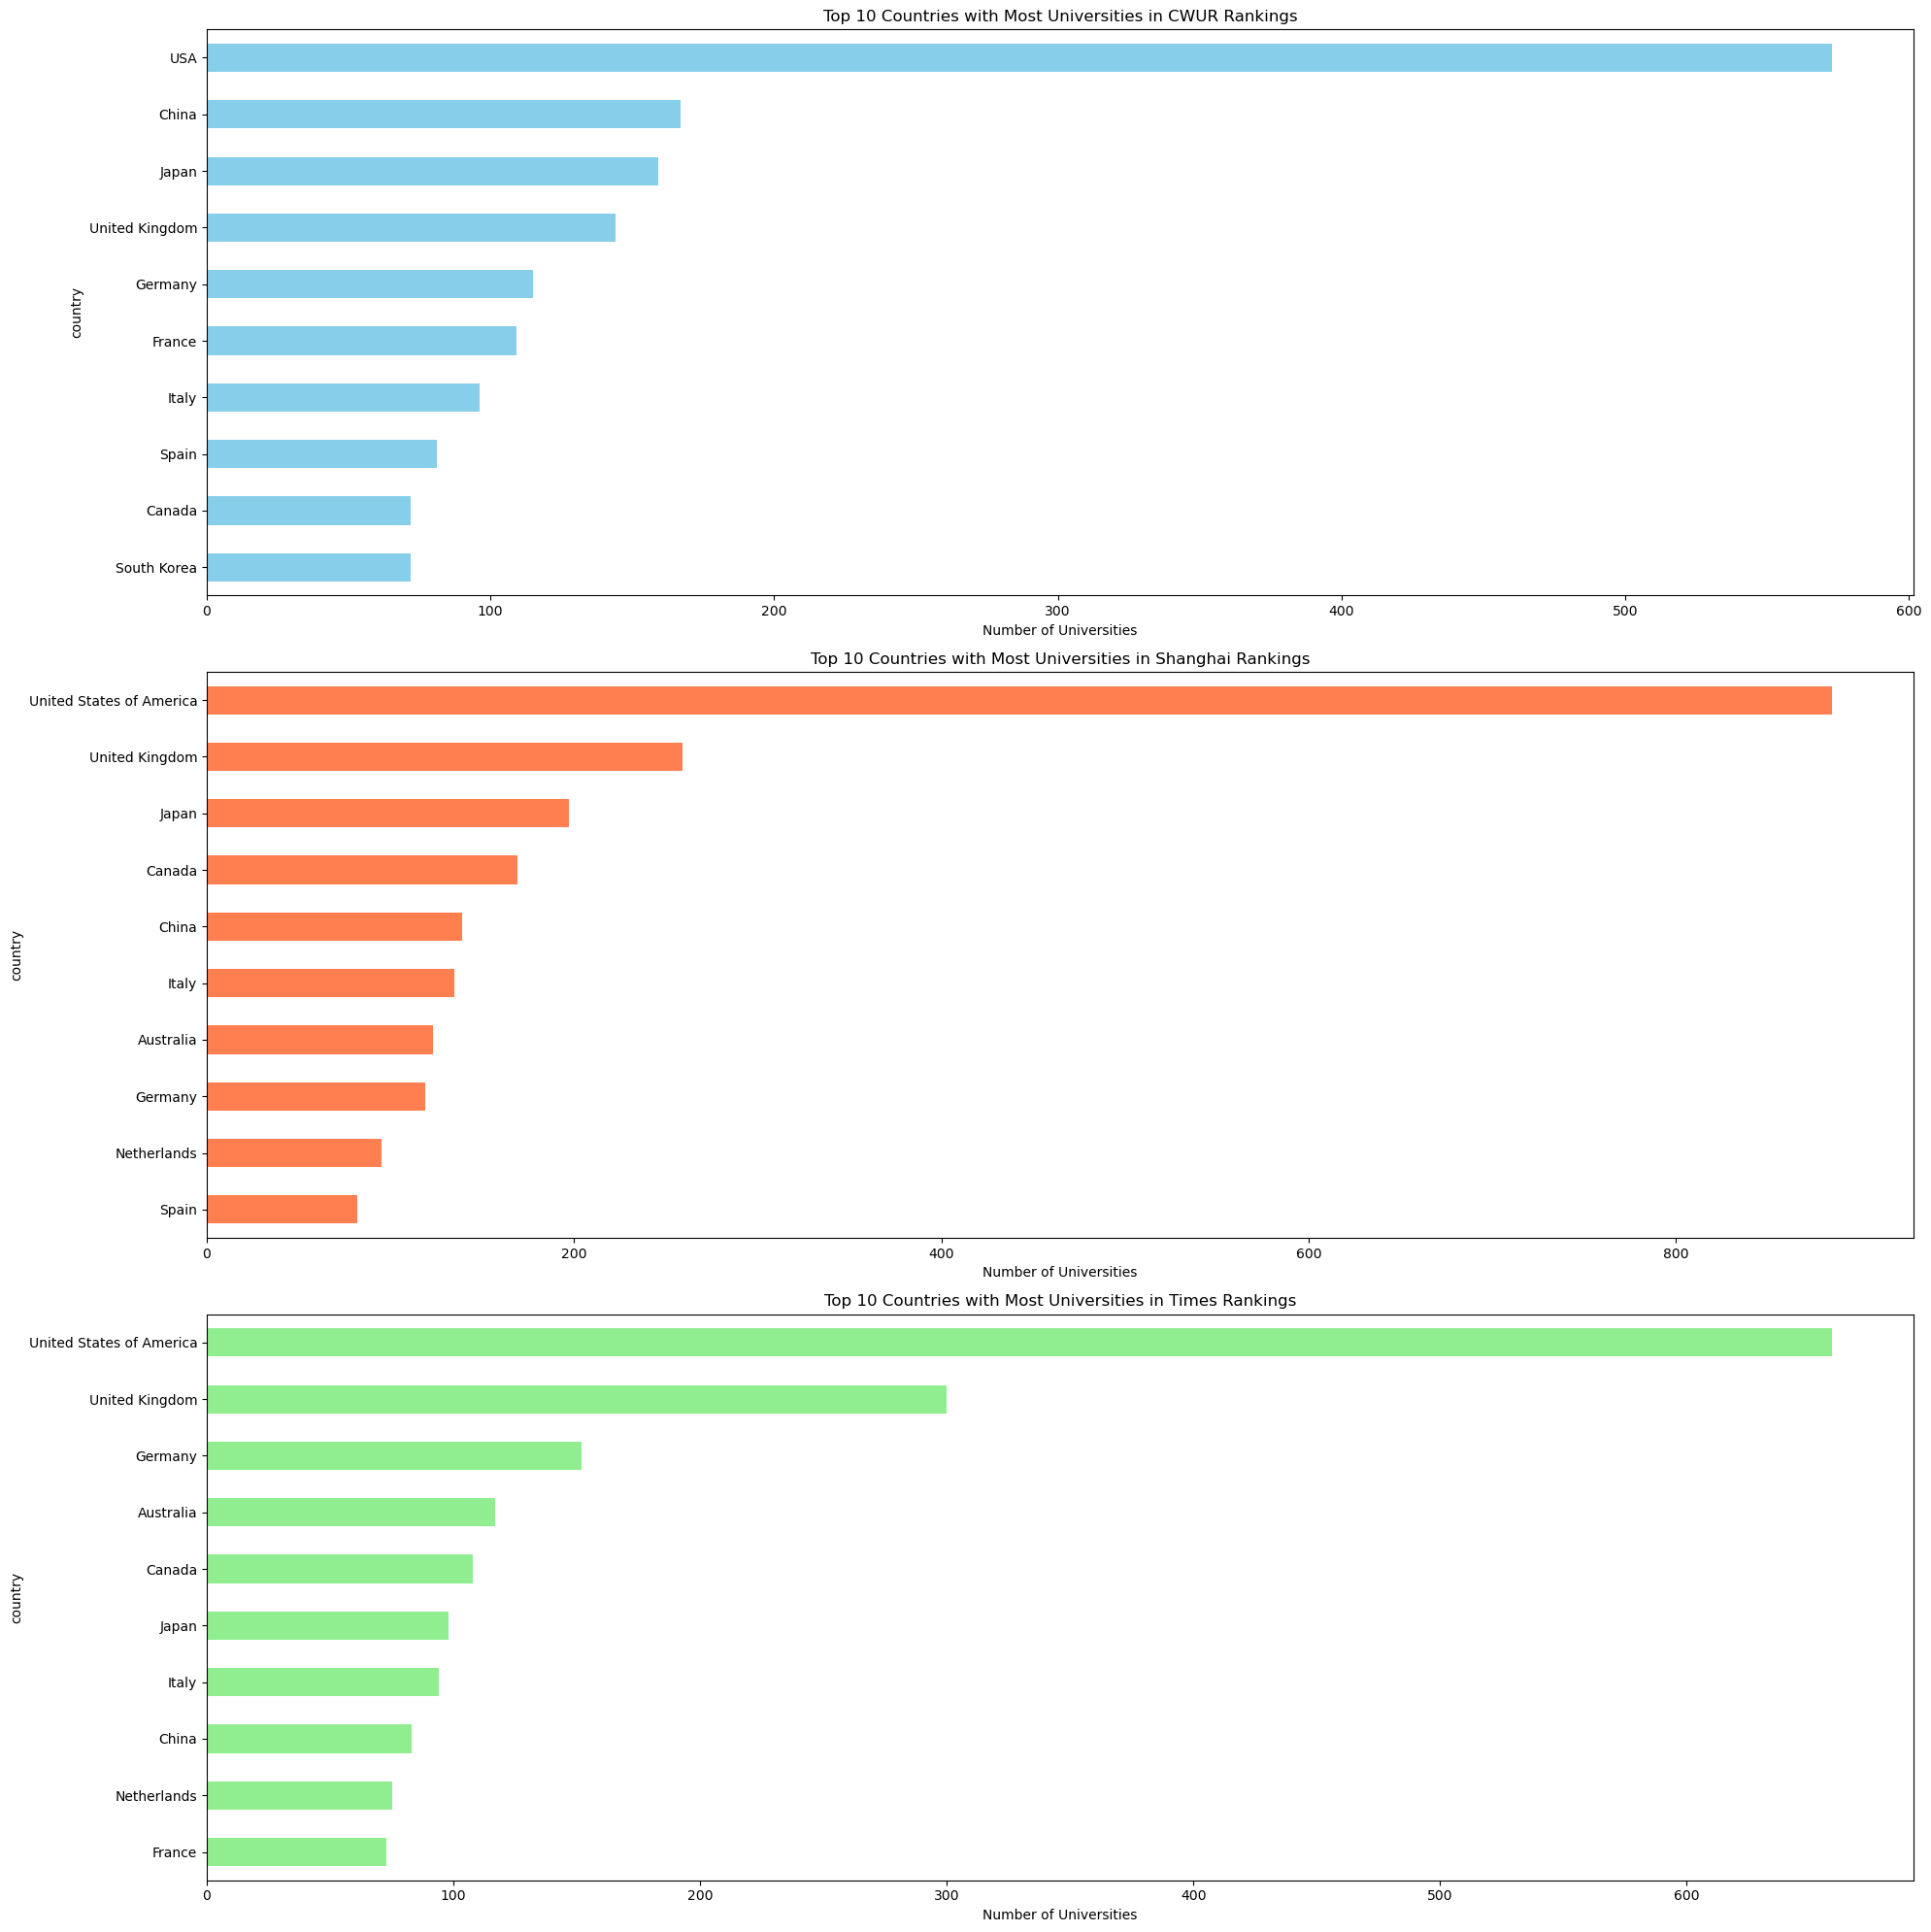

In [16]:
# Loading the school and country dataset
school_country_data = pd.read_csv('data/school_and_country_table.csv')

# Merging the Shanghai data with the school and country dataset
merged_shanghai_data = shanghai_data.merge(school_country_data, left_on='university_name', right_on='school_name', how='left')

# Initializing the figure
plt.figure(figsize=(20, 20))

# CWUR Data
plt.subplot(3, 1, 1)
cwur_data['country'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries with Most Universities in CWUR Rankings')
plt.xlabel('Number of Universities')
plt.gca().invert_yaxis()

# Shanghai Data using merged dataset
plt.subplot(3, 1, 2)
merged_shanghai_data['country'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Countries with Most Universities in Shanghai Rankings')
plt.xlabel('Number of Universities')
plt.gca().invert_yaxis()

# Times Data
plt.subplot(3, 1, 3)
times_data['country'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 Countries with Most Universities in Times Rankings')
plt.xlabel('Number of Universities')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

We can see that USA consistently has the most number of universities for all three rankings. Other countries like China, UK, Japan and Germany also frequently appear in the top.
The distribution of universities among countries varies slightly between the datasets, but the leading countries remain relatively consistent. 

### The number of entries per year per dataset

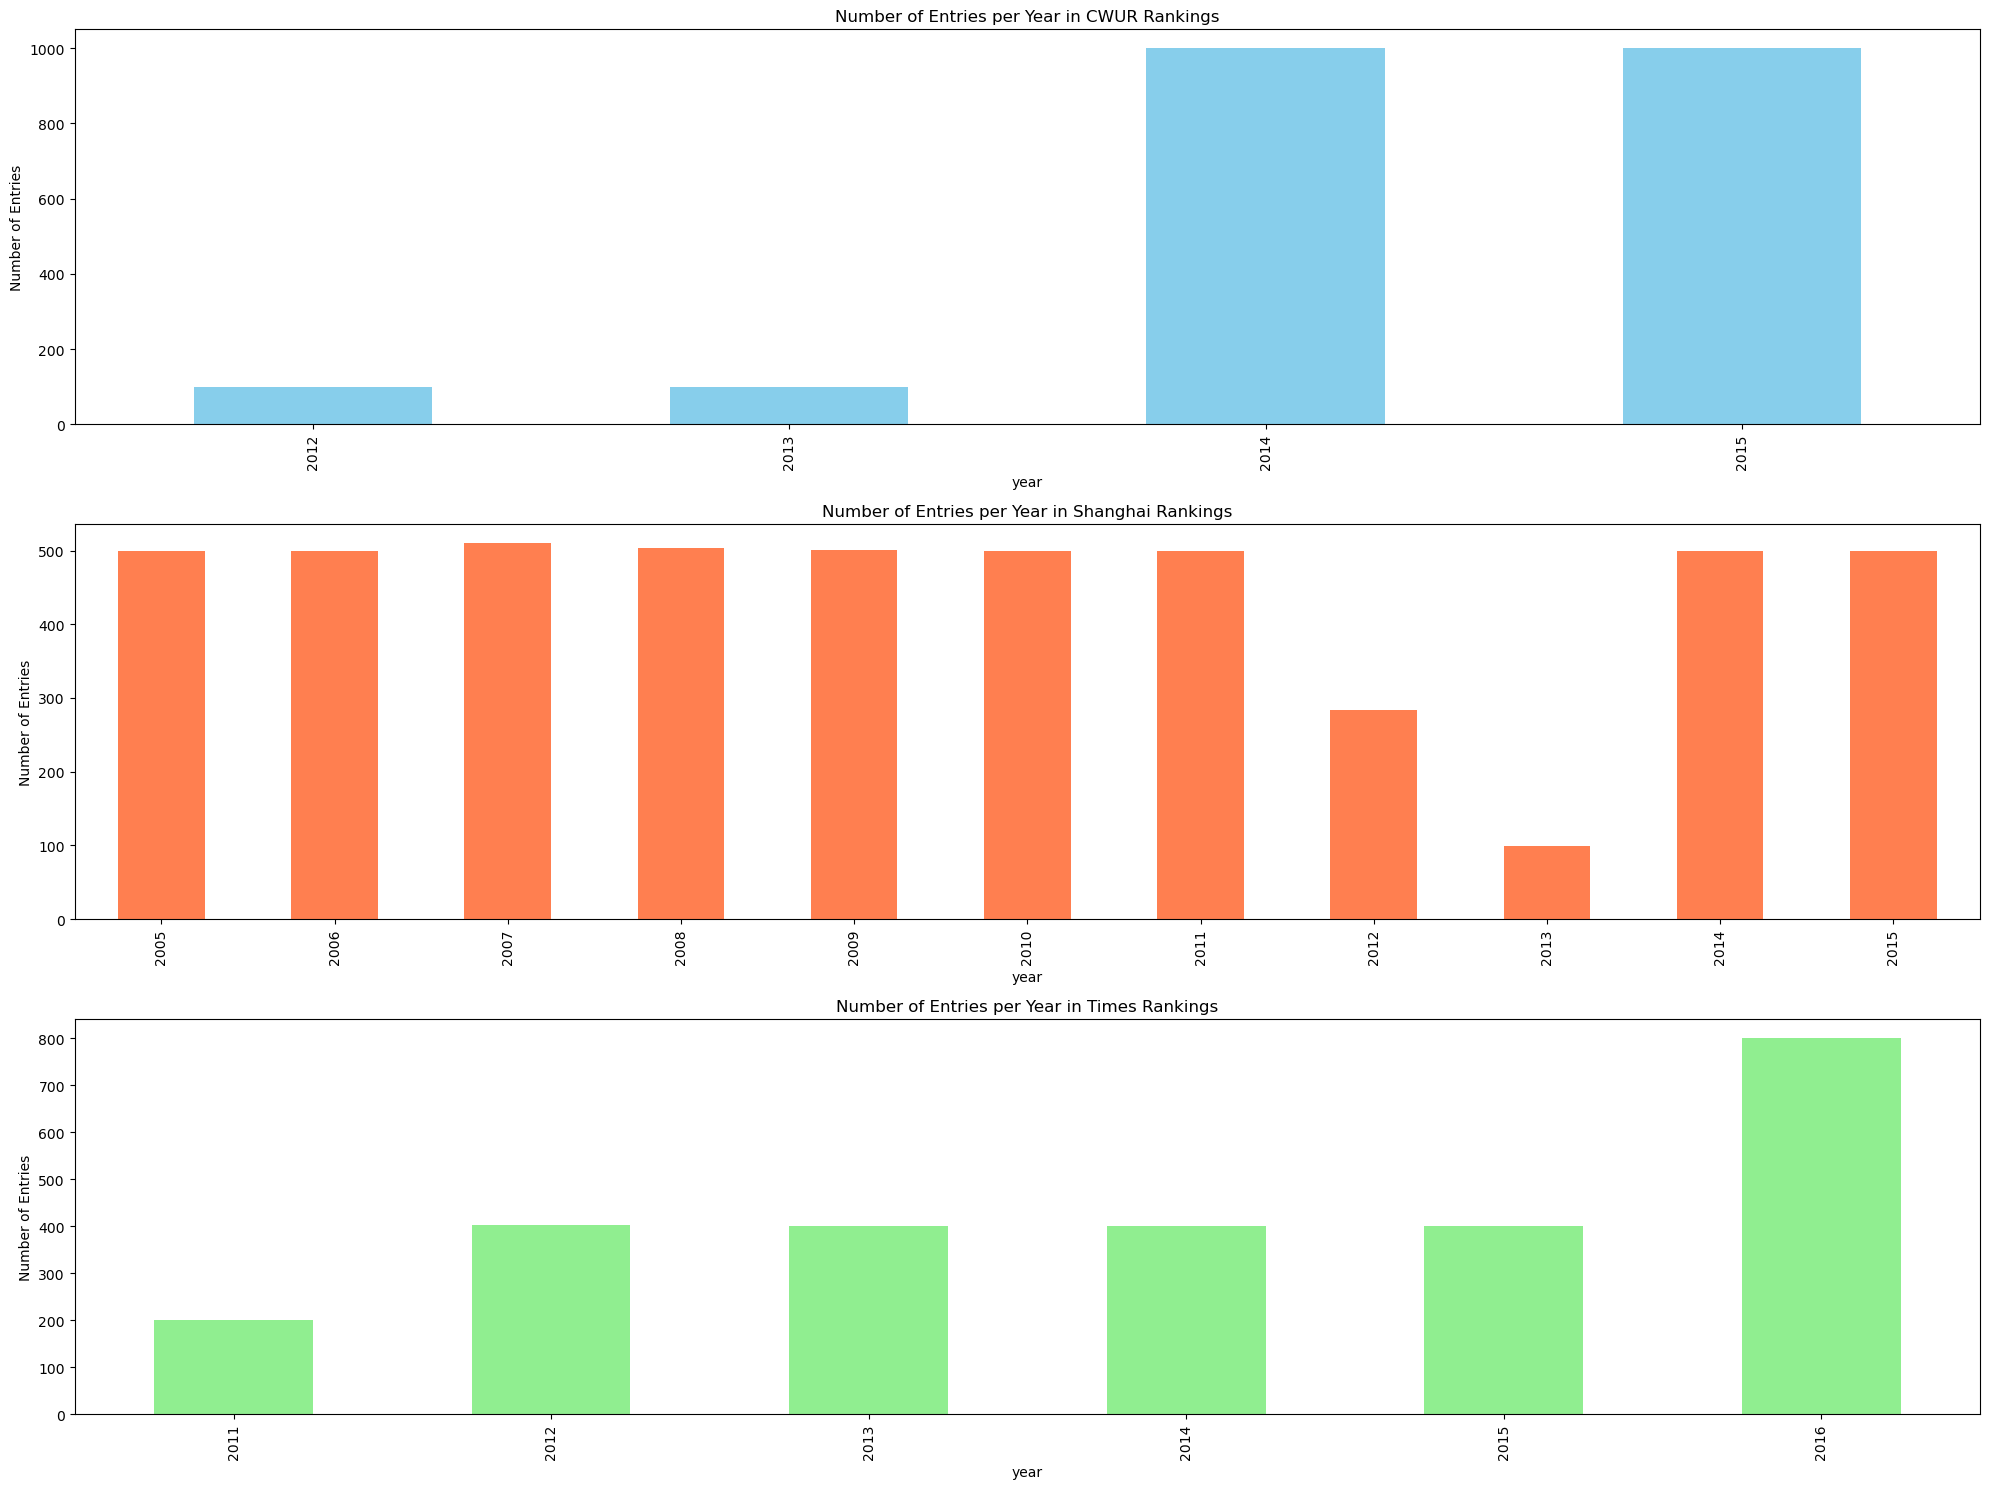

In [17]:
# Plotting the number of entries per year for each dataset

plt.figure(figsize=(20, 15))

# CWUR Data
plt.subplot(3, 1, 1)
cwur_data['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Entries per Year in CWUR Rankings')
plt.ylabel('Number of Entries')

# Shanghai Data
plt.subplot(3, 1, 2)
merged_shanghai_data['year'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.title('Number of Entries per Year in Shanghai Rankings')
plt.ylabel('Number of Entries')

# Times Data
plt.subplot(3, 1, 3)
times_data['year'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Number of Entries per Year in Times Rankings')
plt.ylabel('Number of Entries')

plt.tight_layout()
plt.show()

* CWUR has data from 2012 to 2015, with minimum 100 entries per year.
* Shanghai has from 2005 to 2015, with minimum 100 entries per year.
* Times has from 2011 to 2016, with minimum 200 entries per year. If we cut of the first year, it has a minimum of 400 entries per year.
* Times also has the most recent data, though all datasets are not recent enough that this should disqualify the others.


# 1. Selecting the right dataset for this analysis - The Times Dataset

When choosing a dataset, there are key factors to consider:

* Data Quality & Completeness: It's important that our dataset is both reliable and thorough.
* Time Frame & Volume: The dataset should span relevant years and have enough entries to give a full picture.
* Relevance of Columns: While the dataset has many columns, certain ones are especially relevant to our goals.
* Practical Application: The dataset should also allow us to tackle typical data tasks, like datatype changes and dealing with missing values.

With these factors in mind, the Times Dataset stands out. It runs from 2011 to 2016, and while it starts with at least 200 entries per year, from 2012 onwards, it has a minimum of 400 entries annually. This ensures a wide and detailed view.

Notably, the dataset includes key columns such as:

* num_students: This gives us an idea of how big each university is.
* international_students: This shows how many students come from outside the host country.
* teaching: This hints at the quality of education students receive.
* research: This tells us about the university's research strengths.

Given the depth of entries from 2012 onwards and these essential columns, the **Times Dataset** is our top pick for this analysis.

# 2. Identifying the right criteria for our analysis

In data analysis, the choice of criteria can steer the direction and depth of the investigation. Good criteria are relevant, quantifiable, and actionable, ensuring that the insights derived are both meaningful and impactful. Let's look at the criteria I've chosen for our analysis:

#### 1. Growth in Rank Over Time:
- **Description**: Measures the progression or regression of a university's rank over the years.
- **Rationale**: A consistent improvement in rank can reflect a university's dedicated efforts towards academic and research excellence. Such institutions are likely proactive, forward-looking, and might be more receptive to modern tools like Kahoot!.
- **Data Source**: Derived from the change in the `world_rank` column in the Times dataset over the years.

#### 2. Country's Educational Expenditure:
- **Description**: Represents the financial commitment a country makes towards its educational sector.
- **Rationale**: Countries with significant educational investments are likely more receptive to modern educational tools and methodologies. A robust investment often signifies a nation's readiness to embrace platforms like Kahoot!.
- **Data Source**: While the Times dataset doesn't provide direct expenditure data, this can be cross-referenced with external datasets detailing educational expenditures by country.

#### 3. Research Over Teaching:
- **Description**: A metric that gauges a university's emphasis on research activities versus its traditional teaching endeavors.
- **Rationale**: Institutions with a higher research score than teaching might be more willing to invest in modern educational tools to enhance their pedagogical methods. They might also be more open to experimentation and innovation.
- **Data Source**: Inferred from the `teaching` and `research` columns in the Times dataset, where a higher research score in comparison to the teaching score indicates a stronger research emphasis.

#### 4. Total Student Population:
- **Description**: The aggregate number of students enrolled at a university.
- **Rationale**: The sheer size of a university's student body can be a direct indicator of Kahoot!'s potential outreach. Larger universities offer more classes and have a broader user base, making them prime targets for Kahoot!'s platform.
- **Data Source**: Directly available from the `num_students` column in the Times dataset.




### Additional Criteria Considered

During the process of finalizing the criteria for the analysis, several other potential metrics were pondered upon:

* **Degree of International Students**: 
   - Initially, this was seen as a strategic metric. The rationale was that international students, coming from diverse backgrounds, could potentially introduce Kahoot! to their home countries, thereby facilitating a wider spread. However, it was not prioritized.

* **Technological Infrastructure**: 
   - This would have assessed the university's readiness and infrastructure to adopt digital tools. However, direct metrics on this aspect were not available in the dataset.
  
* **Faculty to Student Ratio**: 
   - While this metric can offer insights into the dynamics of teaching, I decided to drop it, as all faculty are not teaching.


Even though these criteria presented valuable angles of analysis, the final selections were made to best harmonize with Kahoot!'s objectives and the available data.


By focusing on these criteria, I aim to identify universities that best align with Kahoot!'s outreach objectives and ensure that the insights derived are both actionable and impactful.


# 3. Filtering the dataset based on our criteria

## Preprocessing and feature engineering

### World rank


When trying to convert the datatype of the "world rank" column, I found out that the entries with a value over 200 had a range of values instead of a single value. Therefore I decide to cut of all entries over 200. This makes it unneccessary to remove the entries from 2011, as the reasoning for that was that there were less than 400 entries. The rationale for choosing the times dataset still stands, as they still have twice the amount of minimum entries per year as the other datasets.

In [18]:
times_data['world_rank'] = times_data['world_rank'].str.replace("=", "") # Remove the '=' signs that some values had in front of them
times_data = times_data[times_data['world_rank'].str.contains("-") == False] # Remove all values where the rank is a range

times_data_preprocessed = times_data.copy()
times_data_preprocessed['world_rank'] = times_data['world_rank'].astype(int) # Convert the rank to an integer
times_data_preprocessed["world_rank"].unique()

# Check if there are missing numbers in the 'world_rank' column
all_numbers_from_1_to_200 = set(range(1, 201))
missing_numbers = all_numbers_from_1_to_200 - set(times_data_preprocessed['world_rank'].unique())

if missing_numbers:
    print("Missing numbers in the 'world_rank' column:", sorted(missing_numbers))
else:
    print("All numbers from 1 to 200 are present in the 'world_rank' column.")
print(f"The datatype of the 'world_rank' column is now {times_data_preprocessed['world_rank'].dtype}.")

All numbers from 1 to 200 are present in the 'world_rank' column.
The datatype of the 'world_rank' column is now int64.


### Educational expenditure

In [19]:
edu_expenditure_data = pd.read_csv('data/education_expenditure_supplementary_data.csv', encoding='utf-8')

edu_expenditure_data["2011"].fillna(method='bfill', inplace=True) #Some values do not have a value for 2011, so we fill them with the values from the most recent year

# I want to merge the times dataset with the expenditure dataset, but the expenditure dataset has some country names written differently than the times dataset

# I will try to merge them and check if there are any countries that should have gotten a value that did not get one
merged_times_data_test = times_data_preprocessed.merge(edu_expenditure_data, left_on='country', right_on='country', how='left')
merged_times_data_test.rename(columns={"2011": "education_expenditure"}, inplace=True)

print(f"Countries with missing values after merging: {merged_times_data_test[merged_times_data_test['education_expenditure'].isnull()]['country'].unique()}")

Countries with missing values after merging: ['United States of America' 'Hong Kong' 'South Korea' 'Singapore' 'China'
 'Republic of Ireland' 'Taiwan' 'South Africa' 'Egypt']


There are some countries that are not in the educational expenditure dataset. This will impact the results, as we will not be able to compare the countries that are not in the dataset. However, as the dataset is quite large, we will still have a lot of universities. This will be noted when discussing the results.

In [20]:
#Countries that are in the dataset but not in the times dataset
countries_in_times_data = set(times_data_preprocessed['country'].unique())
countries_in_edu_expenditure_data = set(edu_expenditure_data['country'].unique())

countries_in_edu_expenditure_data_but_not_in_times_data = countries_in_edu_expenditure_data - countries_in_times_data  
print("Countries that are in the education expenditure dataset but not in the times dataset:")
print(countries_in_edu_expenditure_data_but_not_in_times_data)

Countries that are in the education expenditure dataset but not in the times dataset:
{'Korea, Republic of', 'Slovak Republic', 'Czech Republic', 'Slovenia', 'Portugal', 'Hungary', 'Estonia', 'Mexico', 'Greece', 'OECD Average', 'Chile', 'Poland', 'Iceland', 'United States', 'Ireland'}


By cross-referencing the countries with missing values after merging with the countries that were not used from the edu_expenditure dataset, we can see that there are some countries that will get values if we just change the names a bit, like the very important "United States" -> "United States of America"

In [21]:
new_country_names = {"United States": "United States of America", "Korea, Republic of": "South Korea", "Ireland": "Republic of Ireland"}
edu_expenditure_data['country'].replace(new_country_names, inplace=True)

merged_times_data = times_data_preprocessed.merge(edu_expenditure_data, left_on='country', right_on='country', how='left')
merged_times_data.rename(columns={"2011": "education_expenditure"}, inplace=True)


### Research over teaching

In [27]:
merged_times_data["research_to_teaching_ratio"] = merged_times_data["research"] / merged_times_data["teaching"]


### Total student population

In [23]:
merged_times_data["num_students"] = merged_times_data["num_students"].str.replace(",", "").astype(float)

### Growth in rank over time


In [24]:
# Growth in rank over time
merged_times_data['rank_difference'] = merged_times_data.groupby('university_name')['world_rank'].transform(lambda x: x.iloc[0] - x.iloc[-1])

## Filtering the dataset

To filter the dataset, I decided that to first filter on being in the 75% quantile for each criteria except rank_difference, and then choose the top 10 universities based on the rank difference.

In [25]:
# Country's Educational Expenditure
q75_expenditure = merged_times_data['education_expenditure'].quantile(0.75)

# Research Over Teaching
q75_research_to_teaching_ratio = merged_times_data['research_to_teaching_ratio'].quantile(0.75)

# Total Student Population
q75_student_population = merged_times_data['num_students'].quantile(0.75)

filtered_data = merged_times_data[
    (merged_times_data['rank_difference'] < 0) &
    (merged_times_data['education_expenditure'] > q75_expenditure) &
    (merged_times_data['research_to_teaching_ratio'] > q75_research_to_teaching_ratio) &
    (merged_times_data['num_students'] > q75_student_population)
]

# Sort by rank_difference in ascending order (and year in descending order to get the most recent data first for later use)
sorted_data = filtered_data.sort_values(by=['rank_difference', 'year'], ascending=[True, False])

# Keep only the first occurrence of each university
unique_sorted_data = sorted_data.drop_duplicates(subset='university_name', keep='first')

# Retrieve the top 10
top_10_unique_universities = unique_sorted_data.head(10)

top_10_unique_universities_selected_columns = top_10_unique_universities[["world_rank", "university_name", "country", "rank_difference", "education_expenditure", "research_to_teaching_ratio", "num_students"]]
top_10_unique_universities_selected_columns

,world_rank,university_name,country,rank_difference,education_expenditure,research_to_teaching_ratio,num_students
455,56,University of Massachusetts,United States of America,-85,4.7,1.184339,56959.0
6438,159,Texas A&M University,United States of America,-29,4.7,1.167442,50657.0
10157,189,Arizona State University,United States of America,-28,4.7,1.175926,83236.0
9597,123,"Rutgers, the State University of New Jersey",United States of America,-18,4.7,1.268793,37032.0
8918,46,University of Texas at Austin,United States of America,-17,4.7,1.175379,49427.0
419,52,University of Minnesota,United States of America,-13,4.7,1.199653,46825.0
9524,113,Purdue University,United States of America,-7,4.7,1.149402,39256.0
9705,136,Stockholm University,Sweden,-7,6.2,1.501466,31715.0
5241,18,University of Michigan,United States of America,-6,4.7,1.231429,41786.0
6879,8,"University of California, Berkeley",United States of America,-5,4.7,1.148456,36186.0


### What if we dropped the educational expenditure criteria?

The educational expenditure criteria had missing values, which resulted in some countries being excluded as a whole. What if we dropped it? Would the results be very different?

In [26]:

filtered_data_without_edu_exp = merged_times_data[
    (merged_times_data['rank_difference'] < 0) &
    (merged_times_data['research_to_teaching_ratio'] > q75_research_to_teaching_ratio) &
    (merged_times_data['num_students'] > q75_student_population)
]

# Sort by rank_difference in ascending order (and year in descending order to get the most recent data first for later use)
# Note that you want to have the most negative rank difference as possible. 
sorted_data_without_edu_exp = filtered_data_without_edu_exp.sort_values(by=['rank_difference', 'year'], ascending=[True, False])

# Keep only the first occurrence of each university
unique_sorted_data_without_edu_exp = sorted_data_without_edu_exp.drop_duplicates(subset='university_name', keep='first')

# Retrieve the top 10
top_10_unique_universities_without_edu_exp = unique_sorted_data_without_edu_exp.head(10)

top_10_unique_universities_selected_columns_without_edu_exp = top_10_unique_universities_without_edu_exp[["world_rank", "university_name", "country", "rank_difference", "education_expenditure", "research_to_teaching_ratio", "num_students"]]
top_10_unique_universities_selected_columns_without_edu_exp

,world_rank,university_name,country,rank_difference,education_expenditure,research_to_teaching_ratio,num_students
455,56,University of Massachusetts,United States of America,-85,4.7,1.184339,56959.0
8138,155,National Taiwan University,Taiwan,-52,NaN,1.174180,31891.0
6438,159,Texas A&M University,United States of America,-29,4.7,1.167442,50657.0
10157,189,Arizona State University,United States of America,-28,4.7,1.175926,83236.0
9597,123,"Rutgers, the State University of New Jersey",United States of America,-18,4.7,1.268793,37032.0
8918,46,University of Texas at Austin,United States of America,-17,4.7,1.175379,49427.0
419,52,University of Minnesota,United States of America,-13,4.7,1.199653,46825.0
9524,113,Purdue University,United States of America,-7,4.7,1.149402,39256.0
9705,136,Stockholm University,Sweden,-7,6.2,1.501466,31715.0
5241,18,University of Michigan,United States of America,-6,4.7,1.231429,41786.0


Here we can see that the list remains the almost the same, except for the addition of the National Taiwan University getting the second place. This is because Taiwan was one of the countries that were excluded due to missing values in the educational expenditure dataset. This should be noted when discussing the results.

# 4. Recommendations & Discussion

## Recommended Universities:

1. University of Massachusetts
2. Arizona State University
3. Stockholm University
4. Texas A&M University
5. Rutgers, the State University of New Jersey
6. University of Texas at Austin
7. University of Minnesota
8. Purdue University
9. University of Michigan
10. University of California, Berkeley

As well as: National Taiwan University (ranks 2. if we drop the educational expenditure criteria)


## Analysis:
### Similarities:

* **Ranking Improvement**: All these universities have seen positive shifts in their global rankings, indicating their growing influence and commitment to excellence in the academic world.
* **Large Student Populations**: Each of these institutions boasts a significant student body, offering a vast potential user base for Kahoot!
* **Research Emphasis**: Almost all of these universities have a strong research component, indicating their forward-thinking approach and potential openness to innovative educational tools.

### Differences:

* **Geographical Distribution**: While the majority are based in the United States, Stockholm University stands out as a European representative, hinting at the potential of expanding in different geographic markets.
* **Education Expenditure**: The American universities hail from a country with an educational expenditure of 4.7%, whereas Stockholm University's home country, Sweden, invests a more substantial 6.2% of its GDP in education.
* **Research vs. Teaching Dynamics**: While all universities emphasize research, the exact ratio of research to teaching varies, with Stockholm University, for instance, having a notably higher research-to-teaching ratio than the others.

In essence, while these universities share certain commendable traits that make them prime targets for Kahoot!, they also offer unique characteristics that Kahoot! can leverage for tailored engagement strategies.

## Discussion:

### Limitations:
* **Data Time Frame**: The datasets used are not the most recent. This might not reflect the current status and priorities of the universities.
* **Incomplete Country Data**: Not all countries were represented in the education expenditure dataset, potentially leading to missed opportunities or skewed perspectives. National Taiwan University is a good example of this.
* **Incomplete Country Data**: Not all countries were represented in the education expenditure dataset, potentially leading to missed opportunities or skewed perspectives.
* **Rank Limitation**: By focusing on the top 200 universities, we may overlook potential targets that are emerging rapidly but haven't made it to the top 200 yet.
* **Data Granularity**: The data focuses on universities as a whole, but universities are vast entities. A more detailed dataset focusing on specific departments or faculties might yield different insights.

### Further Analysis:
* **Forecasting Techniques**: Utilizing predictive models can provide insights into future trends. Techniques such as ARIMA, exponential smoothing, or machine learning models could be employed to predict which universities are on the rise, anticipate shifts in education expenditure for various countries, or forecast the growing influence of online educational tools. This would allow Kahoot! to strategize not just based on current data but also anticipate future trends.
* **Up-to-date complete Educational Expenditure Data**: Securing more recent and comprehensive data on educational expenditure for a broader range of countries can provide a clearer picture of potential markets. This data can reveal nations investing heavily in education, signaling a conducive environment for educational tools like Kahoot!.
* **Integration with Technological Infrastructure Data**: Merging the dataset with data that provides insights into the technological infrastructure of universities might help identify institutions that are more ready to integrate digital tools like Kahoot!.

### Thank you for reading!

This interview case has been both a challenge and a learning experience. I hope you enjoyed reading it as much as I enjoyed working on it. I look forward to possibly discussing it with you in the next interviewing round!